In [1]:
%reload_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

from matplotlib.colors import ListedColormap
import matplotlib as mpl

regular_viper_colors = ['#b3262a', '#2f559a','#e46425','#5aadc5','#f5db12']
light_viper_colors = ['#b3262a', '#d68587','#2f559a','#8299c4']

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=regular_viper_colors) 
regular_viper_cm = ListedColormap(regular_viper_colors)
regular_viper_cm.set_under('white')
light_viper_cm = ListedColormap(light_viper_colors)
light_viper_cm.set_under('white')

figure_output = '../../images'

Downloading...: 100%|██████████| 13.4k/13.4k [00:00<00:00, 9.17MB/s]


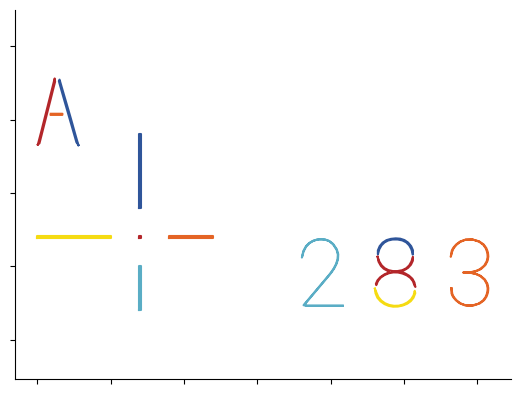

In [2]:

from lmd.lib import Collection, SegmentationLoader
from lmd import tools
import numpy as np
from PIL import Image

calibration = np.array([[0, 0], [0, 100], [50, 50]])

my_collection = Collection(calibration_points = calibration)
my_collection.join(
    tools.makeCross([20, 20], [50,30,30,50], 1, 10)
)
my_collection.join(
    tools.glyph('A', offset=(-50,130), multiplier=5)
)
my_collection.join(
    tools.text('283', offset=np.array([130, 20]), multiplier=5)
)

for shape in my_collection.shapes:
    points = shape.points @ my_collection.orientation_transform * 1
    plt.plot(points[:,0],points[:,1]) 

# remove top and right spine
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.axis('equal')

# remove tick labels
ax.set_yticklabels([])
ax.set_xticklabels([])

# save as eps
plt.savefig(os.path.join(figure_output, 'calibration.eps'), format='eps', dpi=300)

In [3]:

im = Image.open('../Image_Segmentation/segmentation_cytosol.tiff')
segmentation = np.array(im).astype(np.uint32)

labels = np.unique(segmentation)
labels = labels[labels != 0]
np.random.shuffle(labels)

new_label = np.zeros(labels.shape[0] +1, dtype=labels.dtype)
new_label[1:] = labels

# lookup segmentation values in new_label
segmentation = new_label[segmentation]

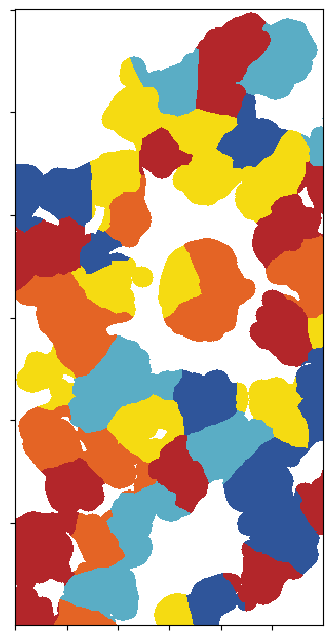

In [4]:
fig, ax = plt.subplots(figsize=(4,8))
ax.imshow(segmentation[:600,500:800], cmap=regular_viper_cm, interpolation='nearest', vmin=1)

# remove tick labels
ax.set_yticklabels([])
ax.set_xticklabels([])

plt.savefig(os.path.join(figure_output,'segmentation.eps'), format='eps', dpi=300)

Processing cell sets in serial


/Users/sophia/Documents/GitHub/py-lmd/src/lmd/lib.py:884: UserWarning: Class 0 is not a valid class and was removed from the cell set
  warnings.warn(


Processing cell sets in serial


/Users/sophia/Documents/GitHub/py-lmd/src/lmd/lib.py:884: UserWarning: Class 0 is not a valid class and was removed from the cell set
  warnings.warn(


Processing cell sets in serial


/Users/sophia/Documents/GitHub/py-lmd/src/lmd/lib.py:884: UserWarning: Class 0 is not a valid class and was removed from the cell set
  warnings.warn(


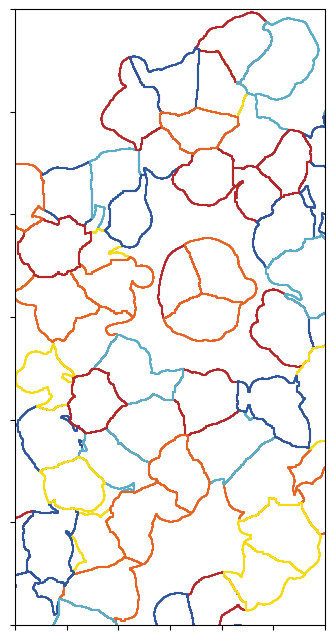

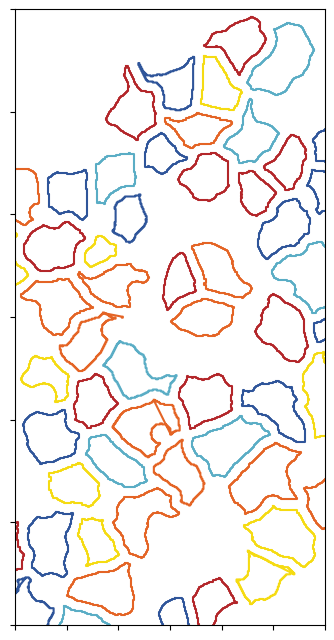

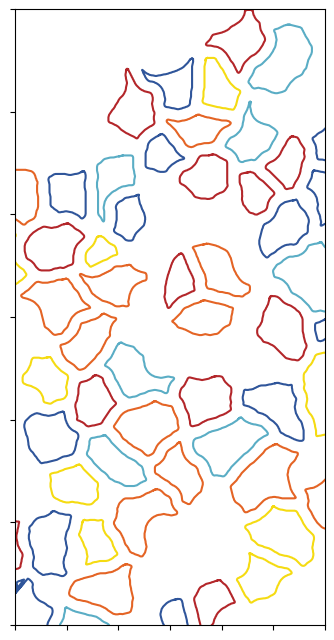

In [5]:
all_classes = np.unique(segmentation)

cell_sets = [{"classes": all_classes, "well": "A1"}]

calibration_points = np.array([[0,0],[0,1000],[1000,1000]])

config_list = [{
    'orientation_transform': np.array([[0, -1],[1, 0]]),
    'join_intersecting': False,
    'shape_erosion': 0,
    'binary_smoothing': 0,
    'convolution_smoothing': 1,
    'rdp':0.5
},
{
    'orientation_transform': np.array([[0, -1],[1, 0]]),
    'join_intersecting': False,
    'shape_erosion': 5,
    'binary_smoothing': 4,
    'convolution_smoothing': 1,
    'rdp':0.5
},
{
    'orientation_transform': np.array([[0, -1],[1, 0]]),
    'join_intersecting': False,
    'shape_erosion': 6,
    'shape_dilation': 0,
    'binary_smoothing': 10,
    'convolution_smoothing': 10,
    'rdp':0.5
}]

for i, loader_config in enumerate(config_list):
    sl = SegmentationLoader(config = loader_config)
    shape_collection = sl(segmentation, 
                        cell_sets, 
                        calibration_points)
                        
    fig, ax = plt.subplots(figsize=(4,8))

    for shape in shape_collection.shapes:
        points = shape.points @ shape_collection.orientation_transform * 1
        ax.plot(points[:,0],points[:,1]) 

    ax.set_xlim(500, 800)
    ax.set_ylim(-600, 0)

    ax.set_yticklabels([])
    ax.set_xticklabels([])

    plt.savefig(os.path.join(figure_output,f'segmentation_{i}.eps'), format='eps', dpi=300)


Processing cell sets in serial


/Users/sophia/Documents/GitHub/py-lmd/src/lmd/lib.py:884: UserWarning: Class 0 is not a valid class and was removed from the cell set
  warnings.warn(


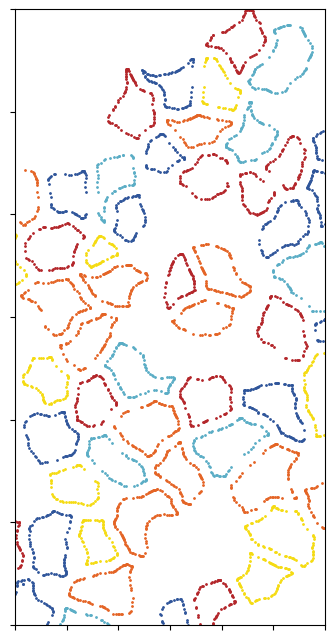

In [7]:
{
    'orientation_transform': np.array([[0, -1],[1, 0]]),
    'join_intersecting': False,
    'shape_erosion': 6,
    'shape_dilation': 0,
    'binary_smoothing': 10,
    'convolution_smoothing': 10,
    'rdp': 1
}


sl = SegmentationLoader(config = loader_config)
shape_collection = sl(segmentation, 
                    cell_sets, 
                    calibration_points)
                    
fig, ax = plt.subplots(figsize=(4,8))

for shape in shape_collection.shapes:
    points = shape.points @ shape_collection.orientation_transform * 1
    #ax.plot(points[:,0],points[:,1]) 
    ax.scatter(points[:,0],points[:,1], s=1)

ax.set_xlim(500, 800)
ax.set_ylim(-600, 0)

ax.set_yticklabels([])
ax.set_xticklabels([])

plt.savefig(os.path.join(figure_output,f'segmentation_3.eps'), format='eps', dpi=300)


In [9]:
segmentation_slice = segmentation[:600,500:800]
segmentation_top = set(np.unique(segmentation_slice[:350])) - {0}
segmentation_bottom = set(np.unique(segmentation_slice[350:])) - {0}
segmentation_top = segmentation_top - segmentation_bottom
print(segmentation_top)
print(segmentation_bottom)



{135, 9, 143, 16, 146, 20, 22, 27, 28, 34, 37, 38, 167, 45, 173, 177, 56, 188, 192, 194, 195, 70, 201, 80, 208, 89, 98, 99, 102, 117}
{2, 69, 197, 7, 202, 11, 139, 78, 144, 149, 85, 23, 119, 25, 26, 153, 29, 101, 166, 168, 44, 109, 118, 55, 58, 189}


Processing cell sets in serial
Processing cell sets in serial


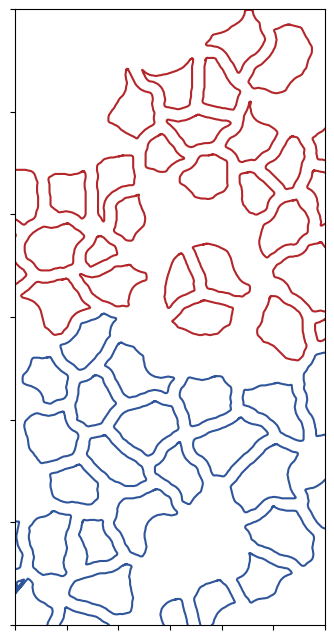

In [10]:
cell_sets = [{"classes": list(segmentation_top), "well": "A1"}]

calibration_points = np.array([[0,0],[0,1000],[1000,1000]])

loader_config = {
    'orientation_transform': np.array([[0, -1],[1, 0]]),
    'join_intersecting': False,
    'shape_erosion': 6,
    'shape_dilation': 0,
    'binary_smoothing': 10,
    'convolution_smoothing': 10,
    'poly_compression_factor':10
}

sl = SegmentationLoader(config = loader_config)
shape_collection = sl(segmentation, 
                    cell_sets, 
                    calibration_points)
                    
#shape_collection.plot(fig_size = (10, 10))

fig, ax = plt.subplots(figsize=(4,8))

for shape in shape_collection.shapes:
    points = shape.points @ shape_collection.orientation_transform * 1
    ax.plot(points[:,0],points[:,1], c = regular_viper_cm(0)) 

cell_sets = [{"classes": list(segmentation_bottom), "well": "A1"}]

calibration_points = np.array([[0,0],[0,1000],[1000,1000]])

sl = SegmentationLoader(config = loader_config)
shape_collection = sl(segmentation, 
                    cell_sets, 
                    calibration_points)
                    
#shape_collection.plot(fig_size = (10, 10))

for shape in shape_collection.shapes:
    points = shape.points @ shape_collection.orientation_transform * 1
    ax.plot(points[:,0],points[:,1], c = regular_viper_cm(1)) 


ax.set_xlim(500, 800)
ax.set_ylim(-600, 0)

ax.set_yticklabels([])
ax.set_xticklabels([])

plt.savefig(os.path.join(figure_output,f'segmentation_4.eps'), format='eps', dpi=300)


Processing cell sets in serial


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 208)

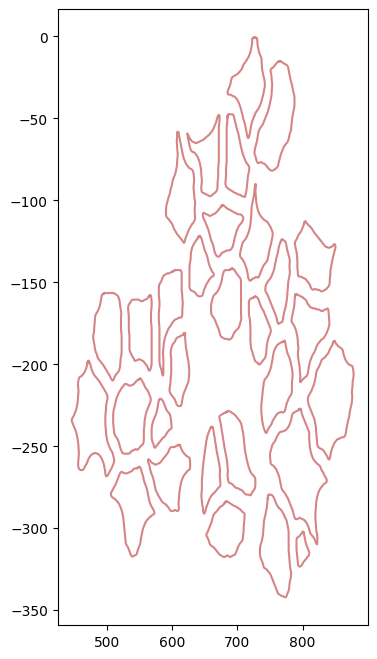

In [ ]:
# calibration_points = np.array([[0,0],[0,1000],[1000,1000]])

# loader_config = {
#     'orientation_transform': np.array([[0, -1],[1, 0]]),
#     'join_intersecting': False,
#     'shape_erosion': 6,
#     'shape_dilation': 0,
#     'binary_smoothing': 10,
#     'convolution_smoothing': 10,
#     'path_optimization': 'hilbert',
#     'rdp':0.5,
#     'hilbert_p':10

# }


# cell_sets = [{"classes": list(segmentation_top), "well": "A1"}]
# sl = SegmentationLoader(config = loader_config)
# shape_collection = sl(segmentation, 
#                     cell_sets, 
#                     calibration_points)
                    
# #shape_collection.plot(fig_size = (10, 10))

# fig, ax = plt.subplots(figsize=(4,8))

# center = []

# for shape in shape_collection.shapes:
#     points = shape.points @ shape_collection.orientation_transform * 1
#     center.append(np.mean(points, axis = 0))
#     ax.plot(points[:,0],points[:,1], c = light_viper_cm(1)) 

# center_transformed = sl.coords_lookup @ shape_collection.orientation_transform * 1
# ax.plot(center_transformed[:,0], center_transformed[:,1], c = light_viper_cm(0))

# cell_sets = [{"classes": list(segmentation_bottom), "well": "A1"}]
# sl = SegmentationLoader(config = loader_config)
# shape_collection = sl(segmentation, 
#                     cell_sets, 
#                     calibration_points)
                    
# #shape_collection.plot(fig_size = (10, 10))

# center = []

# for shape in shape_collection.shapes:
#     points = shape.points @ shape_collection.orientation_transform * 1
#     center.append(np.mean(points, axis = 0))
#     ax.plot(points[:,0],points[:,1], c = light_viper_cm(3)) 

# center_transformed = sl.center @ shape_collection.orientation_transform * 1
# ax.plot(center_transformed[:,0], center_transformed[:,1], c = light_viper_cm(2))

# ax.set_xlim(500, 800)
# ax.set_ylim(-600, 0)

# ax.set_yticklabels([])
# ax.set_xticklabels([])

# plt.savefig(os.path.join(figure_output,f'segmentation_5.eps'), format='eps', dpi=300)


In [12]:
sl.